In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In this section, we will apply the Catboost model to a real-world problem where the task is to predict whether the student will get placed or not. To accomplish this task, let's consider a dataset with a total of 15 columns with information about the placement department. Let us use this dataset to build a Catboost model and try to predict if the individuals are placed or not.

From the 15 features of the dataset, we will be considering the feature named ‘status’ as the target variable, and the remaining features of the dataset will be considered as the input features. This combination of features will be used to build a Catboost model in python. Once the model is built, the model will be evaluated for specific parameters.

Let us now look into the steps involved in the implementation of the Catboost model in python.

Step-2: Load and read the data

Let us read the data available in the CSV format using the pandas module as shown below.

In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Placement_Data.csv') ## reading the data

Now after loading the dataset, let's inspect by checking the top 5 rows of it.

In [3]:
df.head() ## First 5 observations of data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


As we can see, the dataset has values of different features along with two categories for the status feature to be classified. Now, let's check the shape of the dataset.

In [4]:
df.shape

(215, 15)

Here, we can see that the dataset is having 215 rows and 15 columns.

Step 3: Splitting the data for train and test

Before splitting the data into train and test, we will have to separate the dependent and independent features from the dataset.

In [5]:
X=df.drop('status',axis=1)
y=df['status']

Now, let us split these two set of features into train and test by keeping 25% of the data for testing. 



In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42) ## Train:Test = 75:25

As we have successfully split the data into train and test now let us look into building a Catboost model in the next step.

Step 4: Catboost model implementation

Now, let us implement the Catboost model by primarily importing the required module for building the Catboost model.

In [7]:
from catboost import CatBoostClassifier

Before proceeding further let us try to have an instance created to hold all the categorical features of the data.



In [8]:
cat_feat=df.select_dtypes(include='object')
cat_feat_cols=['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex','specialisation']

Now let us create a Catboost classifier instance with certain parameters like iterations and the evaluation metric, on which the model will be evaluated on.



In [9]:
model_cbc=CatBoostClassifier(iterations=100,random_state=42,eval_metric='Accuracy')

As the Catboost classifier instance is created successfully now let us fit the Catboost model with respect to the split data.



In [10]:
model_fit=model_cbc.fit(X_train,y_train,cat_features=cat_feat_cols,plot=True,eval_set=(X_test,y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.054953
0:	learn: 0.9627329	test: 0.9629630	best: 0.9629630 (0)	total: 57.9ms	remaining: 5.73s
1:	learn: 0.9875776	test: 0.9814815	best: 0.9814815 (1)	total: 59.1ms	remaining: 2.9s
2:	learn: 0.9813665	test: 0.9629630	best: 0.9814815 (1)	total: 60.4ms	remaining: 1.95s
3:	learn: 0.9813665	test: 0.9629630	best: 0.9814815 (1)	total: 61.5ms	remaining: 1.48s
4:	learn: 0.9875776	test: 0.9814815	best: 0.9814815 (1)	total: 62.5ms	remaining: 1.19s
5:	learn: 0.9875776	test: 1.0000000	best: 1.0000000 (5)	total: 64ms	remaining: 1s
6:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 65.1ms	remaining: 865ms
7:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 66.3ms	remaining: 762ms
8:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 67.3ms	remaining: 680ms
9:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 68.4ms	remaining: 616ms
10:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 69.4ms	remaining: 562ms
11:	learn: 1.00000

The model can be fitted with respect to various hyperparameters like learning rate and more. But here the model is fitted to some of the default parameters. The model built here will iterate for a total of 100 iterations and produce the result shown below, once the maximum specified iterations are reached.

Here, we can see that the model did not see any significant improvement in the results. So the model's best iteration is mentioned as 5 because the performance of the model will remain the same after the 5th iteration.

Step 5: Evaluating the model performance

Now, let us use the Catboost model built and evaluate certain parameters from the model built. Let us first try to obtain the confusion matrix for the model built. 

For obtaining the confusion matrix for the model built let us make use of the plot_confusion_matrix package from scikit learn.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


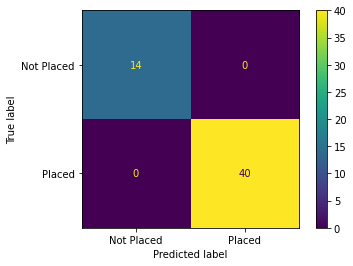

In [11]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_fit,X_test,y_test)

Here we can see that we have passed the fitted model instance along with the test data to obtain the confusion matrix. For better understanding about the model performance let us try to obtain the classification report for the Catboost model.

Let us primarily obtain the predictions from the model built using the predict function on the test data.

In [12]:
y_pred=model_fit.predict(X_test)

So now we can use this prediction instance and try to obtain the classification report for the model. Obtaining the classification report for the model helps us to evaluate various parameters such as accuracy,precision,recall and f1-score.



In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00        14
      Placed       1.00      1.00      1.00        40

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



From the classification report obtained we can evaluate the various parameters of the model and understand how the model is performing with respect to the placement data available.

